60000 60000
(60000, 28, 28) (60000,)


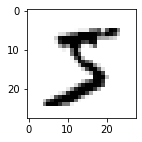

5
(60000, 784) (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Epoch 1/20
240/240 - 1s - loss: 0.4381 - accuracy: 0.8844 - val_loss: 0.2227 - val_accuracy: 0.9360
Epoch 2/20
240/240 - 1s - loss: 0.1921 - accuracy: 0.9462 - val_loss: 0.1605 - val_accuracy: 0.9556
Epoch 3/20
240/240 - 0s - loss: 0.1354 - accuracy: 0.9616 - val_loss: 0.1320 - val_accuracy: 0.9618
Epoch 4/20
240/240 - 1s - loss: 0.1037 - accuracy: 0.9707 - val_loss: 0.1086 - val_accuracy: 0.9693
Epoch 5/20
240/240 - 1s - loss: 0.0820 - accuracy: 0.9767 - val_loss: 0.1008 - val_accuracy: 0.9703
Epoch 6/20
240/240 - 1s - loss: 0.0658 - accuracy: 0.9810 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 7/20
240/240 - 0s - loss: 0.0540 - accuracy: 0.9849 - val_loss: 0.0905 - val_accuracy: 0.9717
Epoch 8/20
240/240 - 1s - loss: 0.0438 - accuracy: 0.9881 - val_loss: 0.0824 - val_accuracy: 0.9754
Epoch 9/20
240/240 - 1s - loss: 0.

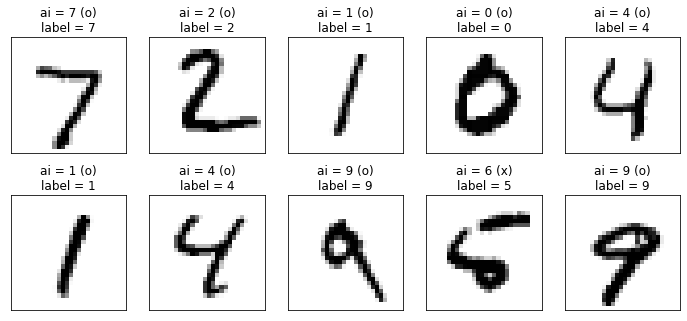

Mnist_mlp_model.h5 模型儲存完畢


In [1]:
#prg4 顯示多張訓練資料的圖片與值
from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)

# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()
	
	# 顯示多張資料副程式，最多顯示 25張
show_image(train_feature[0])  #顯示訓練資料第1個數字

print(train_label[0])    #顯示第1個訓練資料圖片真實值


# 顯示多張圖片與值（最多25張）
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')
# -----------------------------------------------------
#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])

# -----------------------------------------------------
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#顯示第1筆的image正規化
print(train_feature_normalize[0])

# -----------------------------------------------------
# Prg7
# One-Hot Encoding

import numpy as np
from keras.utils import np_utils
np.random.seed(10)

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

# -----------------------------------------------------
# Prg8
#建立模型
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)

# Prg9
# 將模型儲存在 .HDF5檔案中

model.save('Mnist_mlp_model.h5')
print("Mnist_mlp_model.h5 模型儲存完畢")
del model

#載入模型
#load_model('Mnist_ml-Model.h5')

